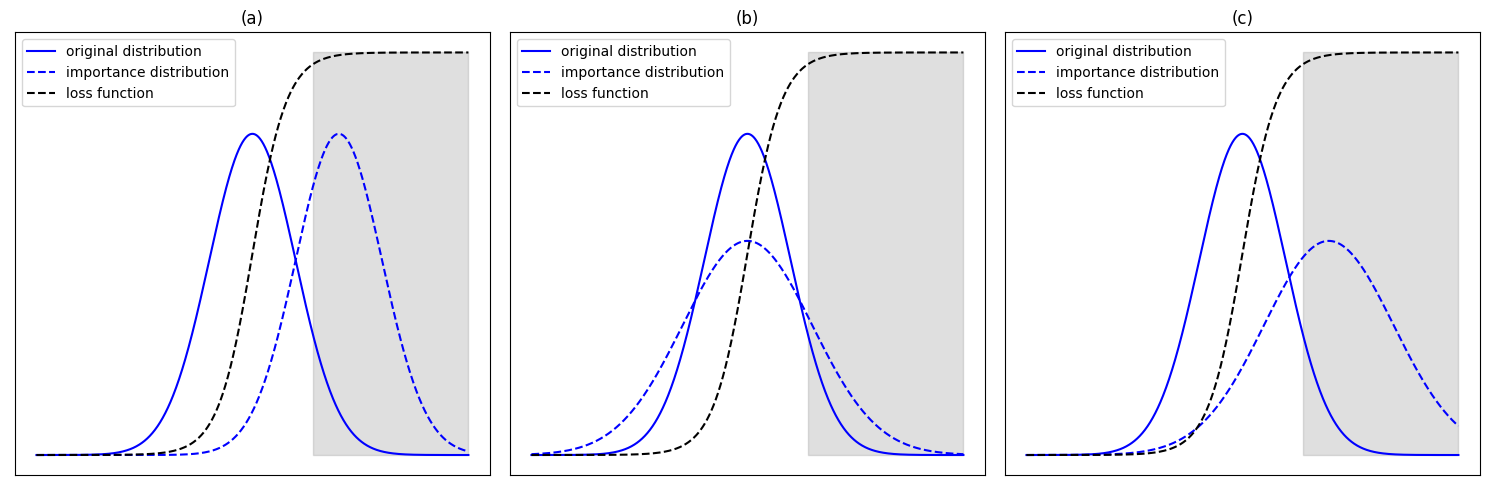

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the original distribution p(x)
mu_p = 0
sigma_p = 1
x = np.linspace(-5, 5, 1000)
p_x = 1 / (sigma_p * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_p)**2 / (2 * sigma_p**2))

# Define the parameters for Mean Translation (MT) and Variance Scaling (VS)
translation = 2  # Mean translation value
scaling = 1.5    # Variance scaling factor

# Calculate the MT-transformed distribution q_MT(x)
q_MT_x = 1 / (sigma_p * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_p - translation)**2 / (2 * sigma_p**2))

# Calculate the VS-transformed distribution q_VS(x)
q_VS_x = 1 / (scaling * sigma_p * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_p)**2 / (2 * (scaling * sigma_p)**2))

# Calculate the combination of MT and VS-transformed distribution q_combined(x)
q_combined_x = 1 / (scaling * sigma_p * np.sqrt(2 * np.pi)) * np.exp(-(x - mu_p - translation)**2 / (2 * (scaling * sigma_p)**2))

# Define the sigmoid function f(x)
def sigmoid(x):
    return 0.5 / (1 + np.exp(-2.5*x + 0))

# Calculate f(x)
f_x = sigmoid(x)

# Find the important region where f(x) has the highest value
important_region = x[f_x >= 0.485]

# Create subplots without axis labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plot MT-transformed distribution with p(x), q_MT(x), and f(x)
ax1.plot(x, p_x, label='original distribution', color='blue')
ax1.plot(x, q_MT_x, label='importance distribution', linestyle='--', color='blue')
ax1.plot(x, f_x, label='loss function', linestyle='--', color='black')
ax1.fill_between(important_region, 0, 0.5, color='gray', alpha=0.25)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('(a)')
ax1.legend()
ax1.grid(False)

# Plot VS-transformed distribution with p(x), q_VS(x), and f(x)
ax2.plot(x, p_x, label='original distribution', color='blue')
ax2.plot(x, q_VS_x, label='importance distribution', linestyle='--', color='blue')
ax2.plot(x, f_x, label='loss function', linestyle='--', color='black')
ax2.fill_between(important_region, 0, 0.5, color='gray', alpha=0.25)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('(b)')
ax2.legend()
ax2.grid(False)

# Plot Combined MT and VS-transformed distribution with p(x), q_combined(x), and f(x)
ax3.plot(x, p_x, label='original distribution', color='blue')
ax3.plot(x, q_combined_x, label='importance distribution', linestyle='--', color='blue')
ax3.plot(x, f_x, label='loss function', linestyle='--', color='black')
ax3.fill_between(important_region, 0, 0.5, color='gray', alpha=0.25)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_title('(c)')
ax3.legend()
ax3.grid(False)

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('IS_techniques.png', format='png', dpi=300)

# Show the plot
plt.show()


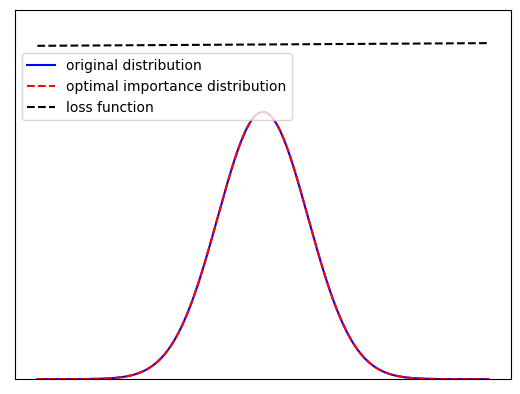

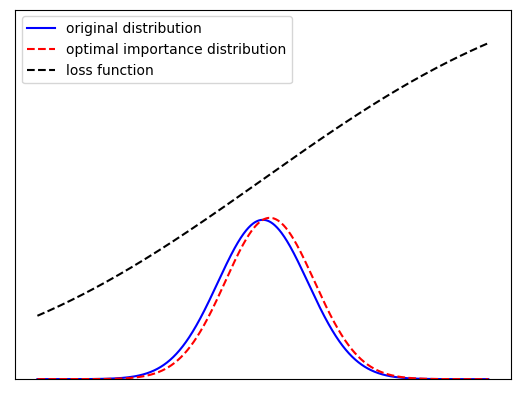

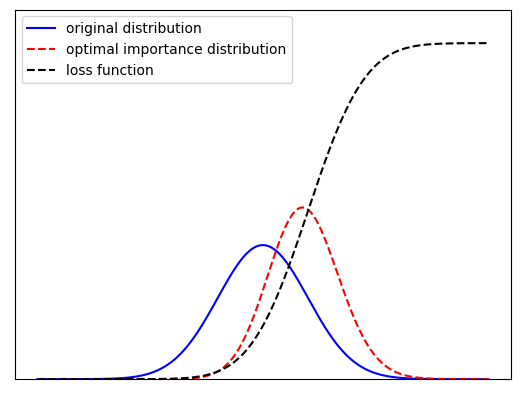

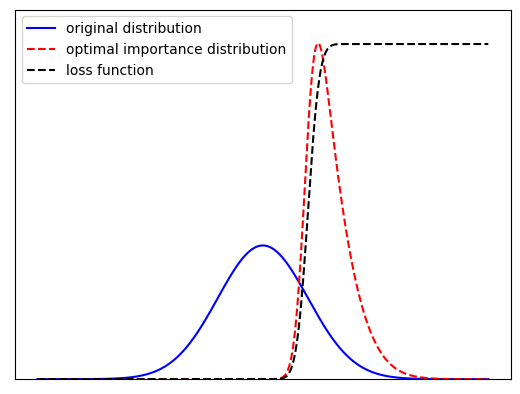

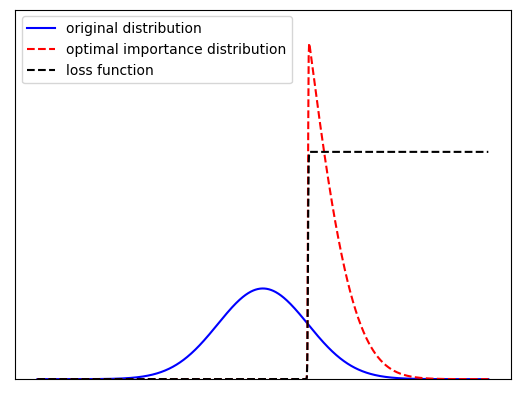

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the loss functions
params = [
    (1, 1000),
    (0, 5),
    (1, 1),
    (1, 0.2),
    (1, 0.01)
]

x = np.linspace(-5, 5, 1000)

for i, (mu, std) in enumerate(params):
    # Original distribution (standard normal)
    p_x = norm.pdf(x)

    # Loss function (CDF of a normal distribution with mean mu and std deviation std)
    loss_function = norm.cdf(x, loc=mu, scale=std)

    # Optimal IS distribution (p(x) * loss_function / true_value)
    true_value = np.trapz(p_x * loss_function, x)
    optimal_is_distribution = p_x * loss_function / true_value

    # Create the plot
    fig, ax1 = plt.subplots()

    # Plot the original distribution and the optimal IS distribution
    line1, = ax1.plot(x, p_x, label='original distribution', color='blue')
    line2, = ax1.plot(x, optimal_is_distribution, label='optimal importance distribution', linestyle='--', color='red')

    # Plot the loss function
    line3, = ax1.plot(x, loss_function, label='loss function', linestyle='--', color='black')

    # Set the y-axis limits to make the curves comparable in height
    ax1.set_ylim(0, max(max(p_x), max(optimal_is_distribution), max(loss_function)) * 1.1)

    # Remove x-axis and y-axis labels
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Adjust the legend position for the first figure
    if i == 0:
        ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.9))
    else:
        ax1.legend(loc='upper left')

    # Save the plot
    plt.savefig(f'optimal_IS_dist_case{i + 1}.png', format='png', dpi=300)

    # Show the plot
    plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1769d2a2-cc69-4c7c-a48d-a5310f119005' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>